# 대학원 합격확률 예측
## 상명대학교 김민정 교수님 python을 활용한 데이터 분석 따라하기
## Admission_Predict_Ver1.1.csv-https://www.kaggle.com/yameenajani/admission


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rawdata = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
rawdata

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#### Data
- GRE Score : 대학원 입시 시험 점수
- TOEFL Score : 토플 점수
- University Rating : 대학교 등급
- SOP : 자기소개서 점수
- LOR : 추천서 점수
- CGPA : 학부 학점
- Research : 연구경험여부
- Chance of admit : 합격확률 

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### 전처리,데이터 탐색

In [5]:
#결측값이 없다.
rawdata.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#분석에 필요없는 Serial No를 버려준다.
rawdata =rawdata.drop(["Serial No."], axis=1)

In [7]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


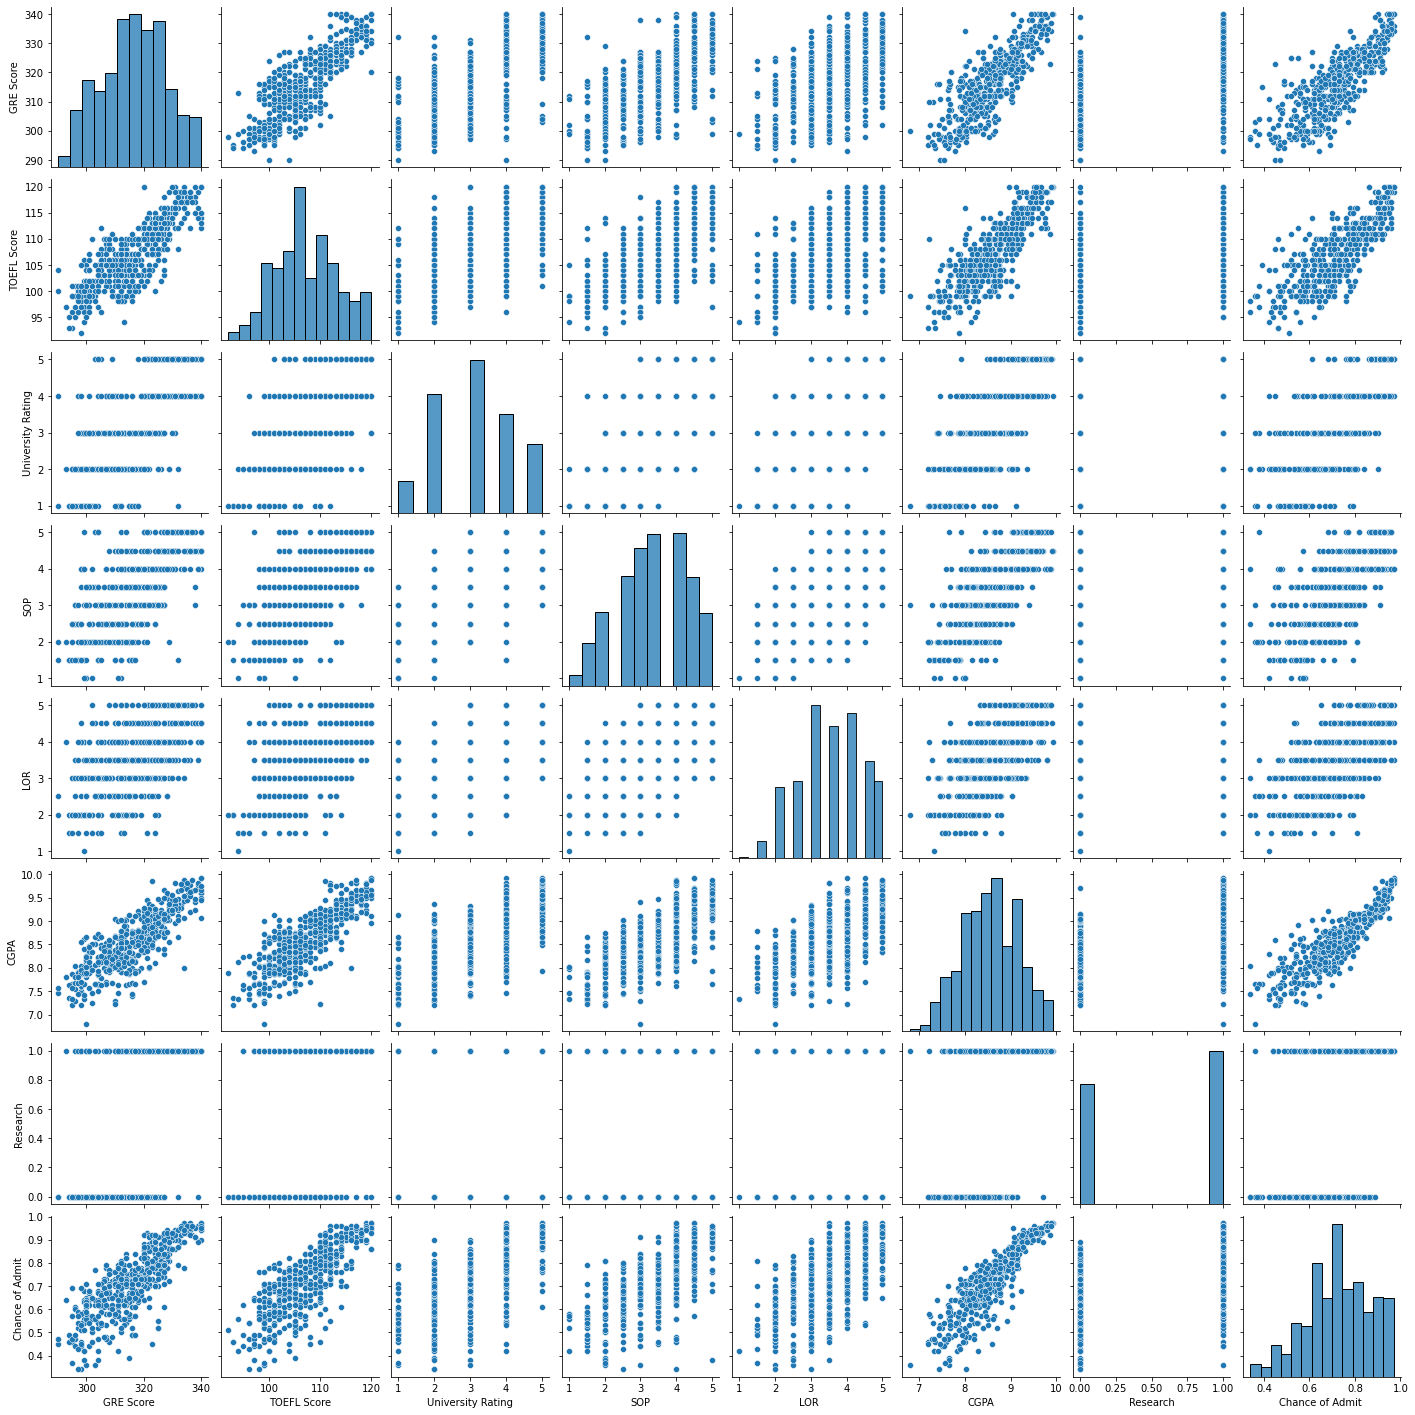

In [8]:
sns.pairplot(rawdata)

## 산점도보고 해석하기  Chance of Admit- GRE Score, TOEFL Score, CGPA 는 양의 상관관계를 갖는다고 볼 수있다.

In [9]:
#상관분석해보기
import scipy.stats as stats

In [10]:
rawdata.columns =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research', 'Chance of Admit']
rawdata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
#연속형 변수 모으기
rawdata_ctn=rawdata[['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit']]

In [12]:
#상관계수 확인하기
rawdata_ctn.corr(method="pearson")

,GRE Score,TOEFL Score,CGPA,Chance of Admit
GRE Score,1.000000,0.827200,0.825878,0.810351
TOEFL Score,0.827200,1.000000,0.810574,0.792228
CGPA,0.825878,0.810574,1.000000,0.882413
Chance of Admit,0.810351,0.792228,0.882413,1.000000


In [13]:
corr = stats.pearsonr(rawdata["CGPA"], rawdata["Chance of Admit"])
corr

(0.8824125749045745, 3.3965448587100334e-165)

In [14]:
#jointlplt그래프와 상관분석 같이 하기 
def continuous(feature1, feature2):
    corr = stats.pearsonr(rawdata[feature1], rawdata[feature2])
    sns.jointplot(rawdata[feature1], rawdata[feature2])
    return corr

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.8824125749045745, 3.3965448587100334e-165)

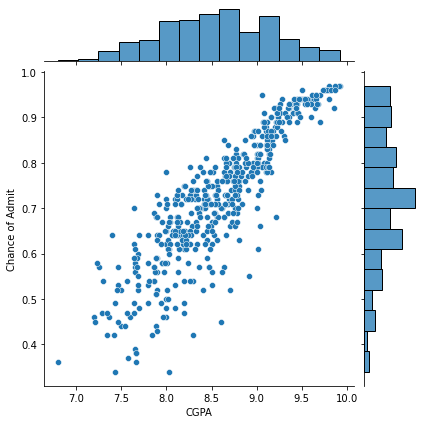

In [15]:
continuous("CGPA","Chance of Admit")

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.8103506354632601, 1.0884036862473808e-117)

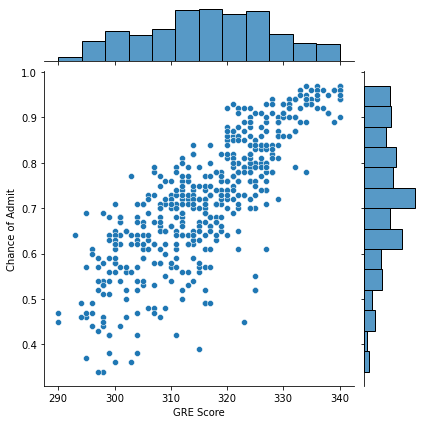

In [16]:
continuous("GRE Score","Chance of Admit")

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.7922276143050825, 6.729926762331574e-109)

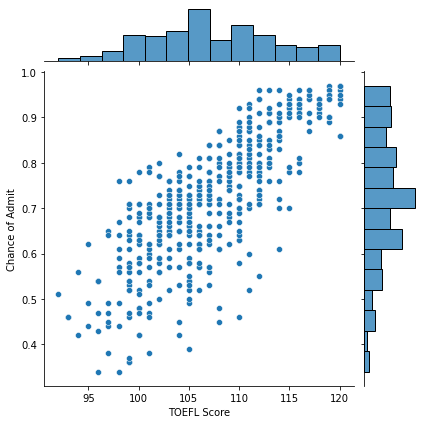

In [17]:
continuous("TOEFL Score","Chance of Admit")

모든 연속형변수의 상관계수가 0.8에 인접 혹은 이상이니 상당한 상관성이 '확격률'에 대해 상당한 상관성을 갖고 있다고 볼 수 있다. 또한 모두 p-value값이 0.05이하이므로 유의하다고 볼 수 있다.

### 평균차이 분석으로 합격확률에 영향을 주는 명목형 변수 구분


'University Rating', 'SOP', 'LOR','Research'

In [18]:
import scipy.stats as stats

In [19]:
rawdata.groupby("University Rating")[["Chance of Admit"]].mean()

,Chance of Admit
University Rating,
1,0.562059
2,0.626111
3,0.702901
4,0.801619
5,0.888082


In [20]:
#University Rating 범주에 따른 Chance of Admit값 분류
value1 =rawdata[rawdata["University Rating"]==1]["Chance of Admit"].values
value2 =rawdata[rawdata["University Rating"]==2]["Chance of Admit"].values
value3 =rawdata[rawdata["University Rating"]==3]["Chance of Admit"].values
value4 =rawdata[rawdata["University Rating"]==4]["Chance of Admit"].values
value5 =rawdata[rawdata["University Rating"]==5]["Chance of Admit"].values

In [21]:
#stats.f_oneway() (f,p-value)
stats.f_oneway(value1,value2,value3,value4,value5)
#F통계량 RKQT이 114.01이며 p-value값이 0.05이하로 University Rating에 따라 Chance of Admit은 유의한 차이가 있다고 볼 수 있다.

F_onewayResult(statistic=114.00804341400004, pvalue=7.753395328023128e-69)

In [22]:
#SOP 범주에 따른 Chance of Admit값 분류
rawdata.groupby("SOP")[["Chance of Admit"]].mean()

,Chance of Admit
SOP,
1.0,0.538333
1.5,0.546400
2.0,0.589535
2.5,0.645312
3.0,0.678500
3.5,0.712045
4.0,0.782809
4.5,0.850000
5.0,0.885000


In [23]:
value10=rawdata[rawdata["SOP"]==1.0]["Chance of Admit"].values
value15=rawdata[rawdata["SOP"]==1.5]["Chance of Admit"].values
value20=rawdata[rawdata["SOP"]==2.0]["Chance of Admit"].values
value25=rawdata[rawdata["SOP"]==2.5]["Chance of Admit"].values
value30=rawdata[rawdata["SOP"]==3.0]["Chance of Admit"].values
value35=rawdata[rawdata["SOP"]==3.5]["Chance of Admit"].values
value40=rawdata[rawdata["SOP"]==4.0]["Chance of Admit"].values
value45=rawdata[rawdata["SOP"]==4.5]["Chance of Admit"].values
value50=rawdata[rawdata["SOP"]==5.0]["Chance of Admit"].values

In [24]:
stats.f_oneway(value10, value15, value20, value25, value30, value35, value40, value45, value50)
#F통계량값이 55.97 , 유의확률이 0.05보다 작으니 SOP에 따라 Chance of Admit은 유의한 차이가 있다고 볼 수 있다.

F_onewayResult(statistic=55.974076863949875, pvalue=2.18047357827063e-64)

In [25]:
rawdata.groupby("LOR")[["Chance of Admit"]].mean()

,Chance of Admit
LOR,
1.0,0.420000
1.5,0.550000
2.0,0.568261
2.5,0.640600
3.0,0.668485
3.5,0.723023
4.0,0.764149
4.5,0.831905
5.0,0.872600


In [26]:
value100=rawdata[rawdata["LOR"]==1.0]["Chance of Admit"].values
value150=rawdata[rawdata["LOR"]==1.5]["Chance of Admit"].values
value200=rawdata[rawdata["LOR"]==2.0]["Chance of Admit"].values
value250=rawdata[rawdata["LOR"]==2.5]["Chance of Admit"].values
value300=rawdata[rawdata["LOR"]==3.0]["Chance of Admit"].values
value350=rawdata[rawdata["LOR"]==3.5]["Chance of Admit"].values
value400=rawdata[rawdata["LOR"]==4.0]["Chance of Admit"].values
value450=rawdata[rawdata["LOR"]==4.5]["Chance of Admit"].values
value500=rawdata[rawdata["LOR"]==5.0]["Chance of Admit"].values

In [27]:
stats.f_oneway(value100, value150, value200, value250, value300, value350, value400, value450, value500)
#F통계량값이 44.55 , 유의확률이 0.05보다 작으니 LOR에 따라 Chance of Admit은 유의한 차이가 있다고 볼 수 있다.

F_onewayResult(statistic=44.55014196190304, pvalue=1.2475714296300813e-53)

In [28]:
rawdata.groupby("Research")[["Chance of Admit"]].mean()

,Chance of Admit
Research,
0,0.634909
1,0.789964


In [29]:
value_Research0=rawdata[rawdata.Research ==0]["Chance of Admit"].values
value_Research1=rawdata[rawdata.Research ==1]["Chance of Admit"].values

In [30]:
stats.f_oneway(value_Research0,value_Research1)
#F통계량값이 211.38 , 유의확률이 0.05보다 작으니 Research에 따라 Chance of Admit은 유의한 차이가 있다고 볼 수 있다.

F_onewayResult(statistic=211.37662941712802, pvalue=3.5954935458406797e-40)

#### 사후검정

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
def after(feature):
    tukey =  pairwise_tukeyhsd(endog = rawdata["Chance of Admit"], groups = rawdata[feature],
                         alpha= 0.05)
    print(tukey.summary())
    fig=tukey.plot_simultaneous()
    return tukey, fig

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.0641 0.0111   0.01 0.1181   True
     1      3   0.1408  0.001  0.088 0.1936   True
     1      4   0.2396  0.001 0.1843 0.2948   True
     1      5    0.326  0.001 0.2679 0.3841   True
     2      3   0.0768  0.001 0.0435   0.11   True
     2      4   0.1755  0.001 0.1385 0.2125   True
     2      5    0.262  0.001 0.2208 0.3031   True
     3      4   0.0987  0.001 0.0636 0.1338   True
     3      5   0.1852  0.001 0.1457 0.2246   True
     4      5   0.0865  0.001 0.0438 0.1291   True
--------------------------------------------------


C:\Users\201710612\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


(<statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x1b877e9fe20>,
 <Figure size 720x432 with 1 Axes>)

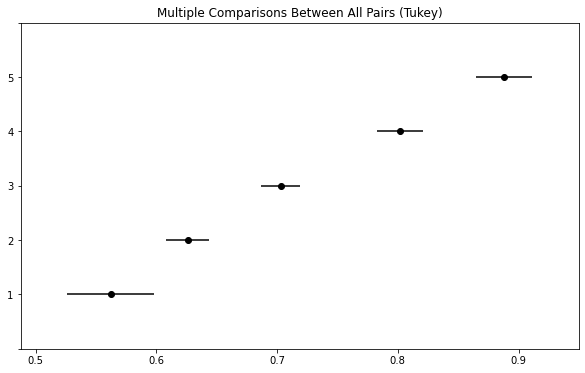

In [33]:
after("University Rating")

- reject 값이 모두 true인걸로 보아 평균간 차이가 있다고 불수 있다.
- 신뢰구간도표에도 겹치는 구간이 나타나고 있지 않는 것으로 보아 유의한 차이가 있다고 볼 수 있다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    1.5   0.0081    0.9 -0.1377 0.1538  False
   1.0    2.0   0.0512    0.9 -0.0885 0.1909  False
   1.0    2.5    0.107 0.2674 -0.0299 0.2439  False
   1.0    3.0   0.1402 0.0369  0.0045 0.2759   True
   1.0    3.5   0.1737 0.0023  0.0384  0.309   True
   1.0    4.0   0.2445  0.001  0.1092 0.3797   True
   1.0    4.5   0.3117  0.001  0.1747 0.4486   True
   1.0    5.0   0.3467  0.001  0.2067 0.4866   True
   1.5    2.0   0.0431 0.7389 -0.0375 0.1238  False
   1.5    2.5   0.0989 0.0017  0.0233 0.1745   True
   1.5    3.0   0.1321  0.001  0.0586 0.2056   True
   1.5    3.5   0.1656  0.001   0.093 0.2383   True
   1.5    4.0   0.2364  0.001  0.1638  0.309   True
   1.5    4.5   0.3036  0.001  0.2278 0.3794   True
   1.5    5.0   0.3386  0.001  0.2576 0.4196   True
   2.0    2.5   0.0558 0.1333 -0.0074  0.119  False
   2.0    3.

(<statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x1b877dd9f40>,
 <Figure size 720x432 with 1 Axes>)

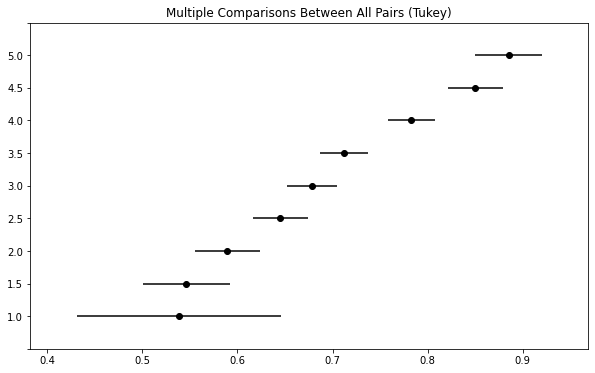

In [34]:
after("SOP")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    1.5     0.13    0.9 -0.2225 0.4825  False
   1.0    2.0   0.1483    0.9 -0.1928 0.4894  False
   1.0    2.5   0.2206 0.5277 -0.1202 0.5614  False
   1.0    3.0   0.2485 0.3555 -0.0907 0.5876  False
   1.0    3.5    0.303 0.1239 -0.0364 0.6424  False
   1.0    4.0   0.3441 0.0438  0.0049 0.6834   True
   1.0    4.5   0.4119 0.0056  0.0718  0.752   True
   1.0    5.0   0.4526 0.0014  0.1118 0.7934   True
   1.5    2.0   0.0183    0.9  -0.095 0.1315  False
   1.5    2.5   0.0906 0.2288 -0.0218  0.203  False
   1.5    3.0   0.1185  0.018  0.0112 0.2257   True
   1.5    3.5    0.173  0.001   0.065 0.2811   True
   1.5    4.0   0.2141  0.001  0.1066 0.3217   True
   1.5    4.5   0.2819  0.001  0.1716 0.3922   True
   1.5    5.0   0.3226  0.001  0.2102  0.435   True
   2.0    2.5   0.0723 0.0315  0.0034 0.1413   True
   2.0    3.

(<statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x1b877bf9220>,
 <Figure size 720x432 with 1 Axes>)

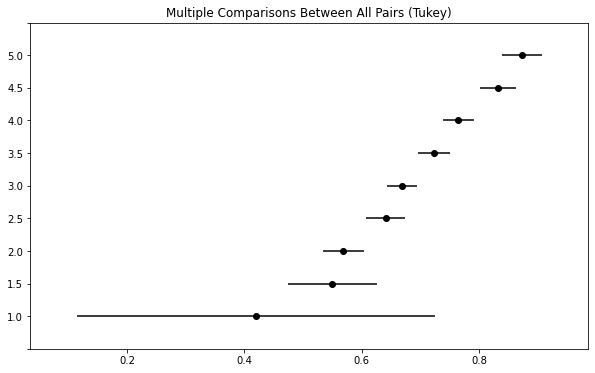

In [35]:
after('LOR')

## 선형회귀분석

In [36]:
import statsmodels.formula.api as smf

In [37]:
df = rawdata.copy()
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
df.columns =["GRE", "TOEFL","UNR","SOP","LOR","CGPA","RSCH","CoA"]

In [39]:
#회귀모형 생성
reg= smf.ols(formula = 'CoA ~CGPA', data =df).fit()
#OLS:잔차제곱합을최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법,최소제곱법

In [40]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          3.40e-165
Time:                        14:09:25   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0443      0.042    -24.689      0.000      -1.127      -0.961
CGPA           0.2059      0.005     41.855      0.000       0.196       0.216
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.520
Skew:                          -0.898   Prob(JB):                     6.84e-32
Kurtosis:                       4.915   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$ Y(CoA)=-1.0443 + 0.2059*X(CGPA)$
- 결정계수가 0.779인걸로 보아 종속변수 분산의 77.9%가 독립변수에 의해 설명된다
- F값은 1752이며 유의확률은 .00으로 유의수준 .05에서 회귀모형이 통계적으로 유의하다고 할 수 있다.
-  t값은 41.86, 유의확률은 .000으로 유의수준 .05에서 회귀계수는 유의한 값이다.

In [41]:
#같은 방법으로 나머지 연속형 변수들도 분석해보기
reg= smf.ols(formula = 'CoA ~CGPA+GRE+TOEFL', data =df).fit()

In [42]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     680.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          2.21e-175
Time:                        14:09:25   Log-Likelihood:                 678.23
No. Observations:                 500   AIC:                            -1348.
Df Residuals:                     496   BIC:                            -1332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5968      0.091    -17.566      0.000      -1.775      -1.418
CGPA           0.1436      0.009     16.003      0.000       0.126       0.161
GRE            0.0024      0.001      4.697      0.000       0.001       0.003
TOEFL          0.0032      0.001      3.573      0.000       0.001       0.005
==============================================================================
Omnibus:                      116.684   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.918
Skew:                          -1.185   Prob(JB):                     1.65e-61
Kurtosis:                       5.796   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#reg 회귀모형통해 예측하기
df["predict"] = pd.DataFrame({"preduct" : reg.predict()} )
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA,predict
0,337,118,4,4.5,4.5,9.65,1,0.92,0.958727
1,324,107,4,4.0,4.5,8.87,1,0.76,0.780979
2,316,104,3,3.0,3.5,8.00,1,0.72,0.627658
3,322,110,3,3.5,2.5,8.67,1,0.80,0.757156
4,314,103,2,2.0,3.0,8.21,0,0.65,0.649906


In [44]:
#mse:오차의 제곱에 대해 평균을 취한거 rmse:오차의 제곱에 대해 평균을 취하고 이를 제곱근 한 것
# mes,와 rmse가 작을수록 추정의 정확도가 크다고 할 수 있음
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df["CoA"], df["predict"])
RMSE =np.sqrt(MSE)

print("MSE :", MSE, "RMSE :", RMSE)

MSE : 0.0038843713225257077 RMSE : 0.0623247248090652


In [45]:
from sklearn.metrics import r2_score

In [46]:
#r2를 이용해 결정계수 구하기
r2_score(df["CoA"],df["predict"])


0.8046166796554792

In [47]:
reg2 = smf.ols(formula ='CoA ~ GRE + TOEFL + C(UNR) + C(SOP) + C(LOR) + CGPA + C(RSCH)', data=df).fit()

In [48]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     94.37
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          1.00e-163
Time:                        14:09:26   Log-Likelihood:                 708.11
No. Observations:                 500   AIC:                            -1366.
Df Residuals:                     475   BIC:                            -1261.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2593      0.124    -10.175      0.000      -1.502      -1.016
C(UNR)[T.2]      -0.0179      0.013     -1.342      0.180      -0.044       0.008
C(UNR)[T.3]      -0.0092      0.014     -0.647      0.518      -0.037       0.019
C(UNR)[T.4]      -0.0092      0.016     -0.579      0.563      -0.041       0.022
C(UNR)[T.5]       0.0098      0.018      0.548      0.584      -0.025       0.045
C(SOP)[T.1.5]    -0.0085      0.030     -0.283      0.778      -0.068       0.051
C(SOP)[T.2.0]    -0.0067      0.030     -0.225      0.822      -0.065       0.052
C(SOP)[T.2.5]     0.0160      0.030      0.533      0.594      -0.043       0.075
C(SOP)[T.3.0]     0.0078      0.030      0.260      0.795      -0.051       0.067
C(SOP)[T.3.5]    -0.0008      0.030     -0.028      0.978      -0.061       0.059
C(SOP)[T.4.0]     0.0034      0.031      0.110      0.912      -0.057       0.064
C(SOP)[T.4.5]     0.0090      0.032      0.283      0.777      -0.053       0.071
C(SOP)[T.5.0]     0.0152      0.033      0.467      0.641      -0.049       0.079
C(LOR)[T.1.5]     0.0178      0.068      0.262      0.793      -0.116       0.151
C(LOR)[T.2.0]     0.0516      0.067      0.774      0.439      -0.079       0.182
C(LOR)[T.2.5]     0.0700      0.067      1.049      0.295      -0.061       0.201
C(LOR)[T.3.0]     0.0626      0.067      0.936      0.350      -0.069       0.194
C(LOR)[T.3.5]     0.0766      0.067      1.141      0.254      -0.055       0.208
C(LOR)[T.4.0]     0.0850      0.067      1.266      0.206      -0.047       0.217
C(LOR)[T.4.5]     0.0897      0.067      1.329      0.184      -0.043       0.222
C(LOR)[T.5.0]     0.0993      0.068      1.465      0.144      -0.034       0.232
C(RSCH)[T.1]      0.0245      0.007      3.633      0.000       0.011       0.038
GRE               0.0018      0.001      3.540      0.000       0.001       0.003
TOEFL             0.0029      0.001      3.277      0.001       0.001       0.005
CGPA              0.1183      0.010     11.972      0.000       0.099       0.138
==============================================================================
Omnibus:                      106.370   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.362
Skew:                          -1.090   Prob(JB):                     4.31e-55
Kurtosis:                       5.695   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
df["predict2"] =pd.DataFrame({"predict2": reg2.predict()})
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA,predict,predict2
0,337,118,4,4.5,4.5,9.65,1,0.92,0.958727,0.945198
1,324,107,4,4.0,4.5,8.87,1,0.76,0.780979,0.792034
2,316,104,3,3.0,3.5,8.00,1,0.72,0.627658,0.657316
3,322,110,3,3.5,2.5,8.67,1,0.80,0.757156,0.749522
4,314,103,2,2.0,3.0,8.21,0,0.65,0.649906,0.614104


In [50]:
MSE2 =mean_squared_error(df["CoA"], df["predict2"])
RMSE2 = np.sqrt(MSE2)
r2_score2 = r2_score(df["CoA"], df["predict2"])

print("MSE :", MSE2, ",RMSE :", RMSE2, ",r2 :",r2_score2)

MSE : 0.0034467616461393157 ,RMSE : 0.05870912745169456 ,r2 : 0.8266283836064983


### 오버피팅 피하기 위해 train/test set 분리하여

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
X= rawdata.drop("Chance of Admit", axis=1)
y= rawdata["Chance of Admit"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=123)

In [58]:
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
lr_r2= r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('lr_r2: ',lr_r2, '\nlr_rmse: ', lr_rmse )

lr_r2:  0.8222583019921643 
lr_rmse:  0.06207652148972214


In [60]:
print(r2_score2, RMSE2)

0.8266283836064983 0.05870912745169456


In [61]:
lr.coef_

array([0.00241997, 0.00278622, 0.00361783, 0.00097403, 0.01595199,
       0.1125145 , 0.02378667])

In [62]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

<AxesSubplot:>

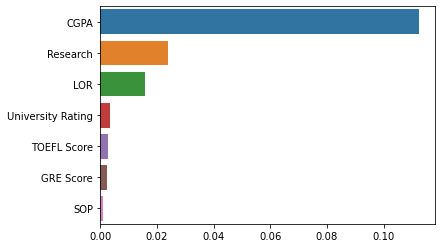

In [74]:
#X에대핸 계수값을  Series로 만들고 시각화 하기
coef = pd.Series(lr.coef_, index = X.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
#CGPA가 합격률에 큰 영향을 미침을 보여줌

# 새로운 데이터

- #### Example
    - GRE : 320
    - TOEFL : 115
    - University Rating : 3
    - SOP : 4.0
    - LOR : 3.5
    - CGPA : 4.0
    - Research : 1

In [71]:
EX = pd.DataFrame([320,115,3,4.0,3.5,4.0,1]).T

In [72]:
EX.head()

,0,1,2,3,4,5,6
0,320.0,115.0,3.0,4.0,3.5,4.0,1.0


In [73]:
lr.predict(EX)

array([0.24899119])